# Air Quality Monitor

# Introduzione
Air Quality Monitor nasce con lo scopo di monitorare la qualità dell'aria delle principali città italiane al fine di poter applicare le migliori strategie per ridurre l'effetto inquinante e per migliorare la qualità della vita.

<br><br>

## Problema

Si vuole affrontare il problema **dell'inquinamento atmosferico**, che è una delle principali minacce alla salute pubblica a livello globale. L'inquinamento dell'aria può causare una serie di gravi **problemi di salute** e inoltre ha un impatto negativo sull'ambiente, contribuendo al cambiamento climatico e **danneggiando gli ecosistemi**.

### Principali inquinanti atmosferici 

L'inquinamento atmosferico dipende fortemente da molti inquinanti atmosferici. Fra i più importanti ci sono:

| Inquinante            | Formula         |
|-----------------------|-----------------|
| Ossido di carbonio    | $CO$            |
| Ossido di azoto       | $NO_x$          |
| Ossido di zolfo       | $SO_x$          |
| Ozono                 | $O_3$           |
| Particolato fine      | $PM_{2.5}$      |
| Particolato grosso    | $PM_{10}$       |
| Ammoniaca             | $NH_3$          |


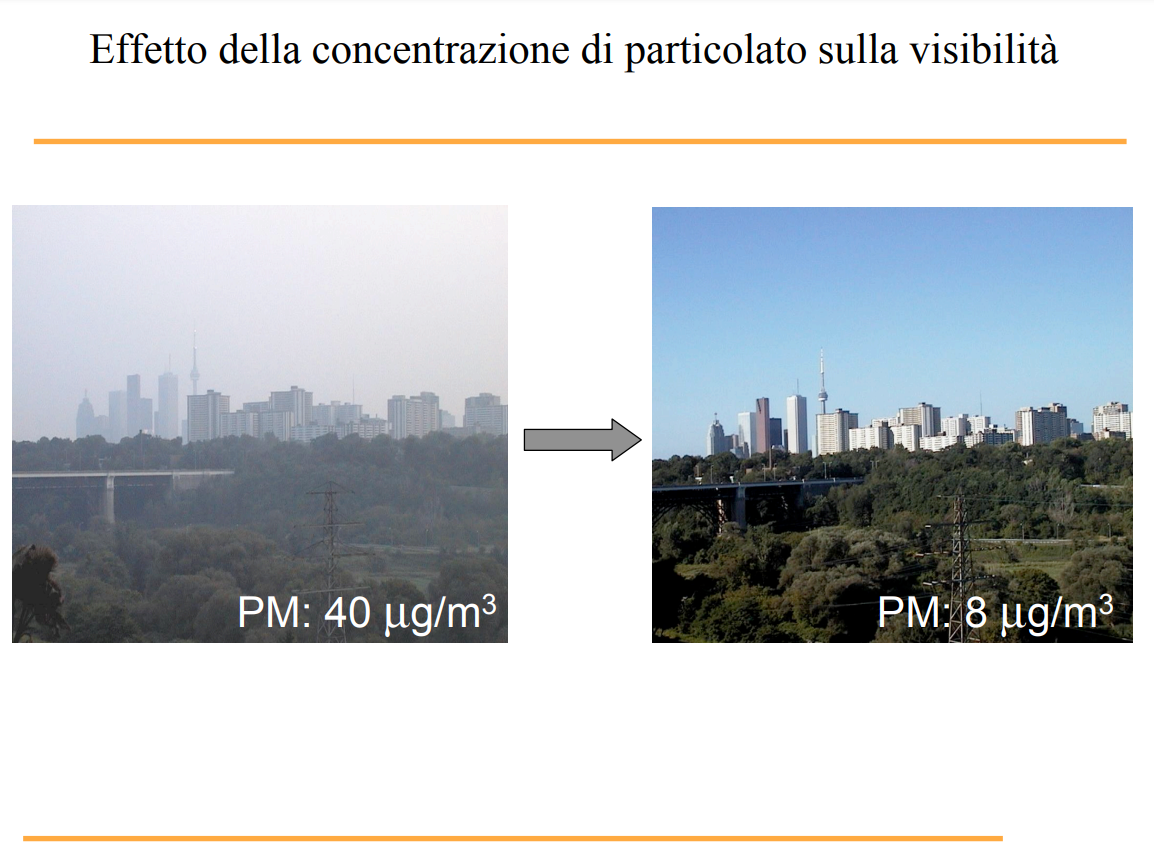

## Soluzione - Necessità di Monitoraggio

Il monitoraggio della qualità dell'aria è essenziale per **proteggere la salute pubblica e l'ambiente**. 

Con dati accurati e in **tempo reale** sulla concentrazione di vari inquinanti, le persone possono prendere decisioni informate per evitare l'esposizione ad aria inquinata. Questo è particolarmente importante per gruppi vulnerabili come bambini, anziani e persone con malattie respiratorie.

## Demo

!/usr/bin/docker-compose

### Applicazioni future

Air Quality Monitor ha un potenziale significativo per essere ampliato e migliorato in diverse direzioni. Ecco alcune applicazioni future del progetto:

#### 1. Estensione Geografica
- Il sistema può essere esteso ad altre **città europee e mondiali**. Questo permetterà un **confronto globale** dei dati sulla qualità dell'aria.

#### 2. Integrazione con Altri Servizi
- **Integrazione con Servizi Sanitari:** Collaborare con **enti sanitari** per fornire dati in tempo reale che possano aiutare a prevedere e gestire emergenze sanitarie legate all'inquinamento atmosferico.
- **Smart City:** Integrare il sistema di monitoraggio con le infrastrutture di smart city per **ottimizzare i trasporti pubblici**, la gestione del traffico e le politiche ambientali.

#### 3. Applicazioni Commerciali
- **Soluzioni per le Aziende:** Offrire servizi di monitoraggio della qualità dell'aria alle aziende che desiderano monitorare e migliorare l'ambiente lavorativo per i loro dipendenti.
- **Settore Immobiliare:** Fornire dati sulla qualità dell'aria per il settore immobiliare, **permettendo agli acquirenti di case di fare scelte informate basate sull'ambiente.**

#### 4. Collaborazioni e Partnership
- **Collaborazioni con Enti di Ricerca:** Lavorare con **università e istituti di ricerca** per condurre studi approfonditi sull'inquinamento atmosferico e sviluppare soluzioni innovative.

<br><br><br><br><br><br><br>
# Come?



Il progetto è reso possibile grazie all’utilizzo di <u>API</u> di [OpenWeather](https://openweathermap.org/) che vengono fornite tramite registrazione gratuita al servizio, quindi con l’utilizzo di una chiave che viene fornita successivamente.

Fra le varie tecnologie utilizzate vi sono:
- **Google Cloud**
- **Docker**
- **Logstash**
- **Kafka**
- **Spark**
- **Elasticsearch**
- **Kibana**

Il progetto è visualizzabile al seguente link di Github dove vi è la guida per l’avvio e la configurazione nel file `README.md`

[👉Link](https://github.com/Picred/air-quality-monitor)


## Google Cloud

https://cloud.google.com/products/compute

Google Cloud mette a disposizione delle macchine virtuali in varie parti del mondo che possono avere varie caratteristiche. Permette crea ed esegui facilmente VM online su un'infrastruttura cloud affidabile e ad alte prestazioni.

## Il servizio di OpenWeather

![OpenWeather Logo](https://openweathermap.org/themes/openweathermap/assets/img/logo_white_cropped.png)

**OpenWeatherMap** è un servizio online, di proprietà di *OpenWeather Ltd*, che fornisce dati meteorologici globali tramite API, inclusi dati meteorologici attuali, previsioni, nowcast e dati meteorologici storici. L'azienda offre una previsione delle precipitazioni iperlocalizzata **minuto per minuto**. 

## Pollution API
Per l’utilizzo delle API si è scelto di usare quelle relative agli indici di inquinamento dell'aria (*Air Quality Index - AQI*).
E' presente la documentazione online consultabile al [seguente link](https://openweathermap.org/api/air-pollution). 

In breve è possibile eseguire alcune operazioni tramite richieste HTTP (di tipo *GET*) che permettono di ottenere dati riguardanti del tipo:

In [ ]:
{
  "coord":[
    50,
    50
  ],
  "list":[
    {
      "dt":1605182400,
      "main":{
        "aqi":1
      },
      "components":{
        "co":201.94053649902344,
        "no":0.01877197064459324,
        "no2":0.7711350917816162,
        "o3":68.66455078125,
        "so2":0.6407499313354492,
        "pm2_5":0.5,
        "pm10":0.540438711643219,
        "nh3":0.12369127571582794
      }
    }
  ]
}

## Docker

![docker-logo](https://www.mercurio.it/sites/mercurio.it/files/field/image/homepage-docker-logo.png)

[Docker](https://www.docker.com/) è una piattaforma di sviluppo software che permette di **creare**, **distribuire** e **gestire applicazioni** in contenitori (*container*) leggeri e autonomi. 

I contenitori Docker includono tutto il necessario per eseguire un'applicazione, come codice, librerie e dipendenze, garantendo che l'applicazione funzioni in modo coerente in qualsiasi ambiente. 

*Questa tecnologia è ampiamente utilizzata nello sviluppo e nella distribuzione di software, facilitando la creazione di ambienti isolati e riproducibili.*

### Docker Compose

[Docker Compose](https://docs.docker.com/compose/) è uno strumento che consente di definire e gestire applicazioni **multi-container Docker**. Con Docker Compose si possono descrivere le diverse parti dell'applicazione in un file di configurazione `YML` inclusi i servizi, le reti e i volumi necessari, insieme alle configurazioni di ciascun componente. 

Questo file di configurazione semplifica la gestione delle applicazioni distribuite su più contenitori, consentendo di avviare, arrestare e aggiornare facilmente l'intero stack di applicazioni con un **unico comando**.

## Ingestion Manager (python)

E' stato scritto un file `ingestion-manager.py` in modo tale da gestire più da vicino quello che accade. 

In tale script viene usata la libreria **requests** per fare delle richieste HTTP ai vari URL che permettono di usare le API di IQAir per recuperare i dati di nostro interesse.

Per quanto riguarda la connessione fra i dati ricevuti dalle chiamate API e Logstash si è optato, come specificato prima, di utilizzare la libreria [pylogbeat](https://pypi.org/project/pylogbeat/) in modo da semplificare la complessità del codice. All’interno dell’`ingestion-manager.py` vi sono anche dei controlli che riguardano le variabili d’ambiente.

### Funzionamento e logica

Il file `ingestion-manager.py` viene usato per fare le chiamate GET al server IQAir. In particolar modo è necessaria la registrazione al servizio per l’ottenimento dell’**API_KEY** usata per comporre i link corretti. Di base, nel container Docker che viene creato, vengono impostate delle variabili d’ambiente di default, tra cui:

* `DATA_ACTION`, che permette di definire l’azione da eseguire sui dati che è una di quelle che è fornita dalle API (descritte nell’Introduzione) che possono essere:
  - `ALL_COUNTRIES` per ottenere tutte le nazioni supportate;
  - `ALL_STATES_BY_COUNTRY` per ottenere tuStte le regioni in una nazione;
  - `ALL_CITIES_BY_STATE_COUNTRY` per ottenere tutte le città in una specifica regione e nazione;
  - `NEAREST_IP_CITY` per ottenere la città più vicina (tramite IP);
  - `NEAREST_GPS_CITY` per ottenere la città più vicina (tramite GPS);
  - `SPECIFIC_CITY` per ottenere una città specifica
  - `DEMO` per simulare dei dati da un file json con 10 elementi
  - `NODEMO` per ottenere le principali città dopo aver specificato una nazione COUNTRY_NAME (che di default è *Italy*)
* `API_KEY` banalmente quella fornita in seguito alla registrazione su *IQAir*;
* `COUNTRY_NAME` nome della nazione da analizzare;
* `STATE_NAME` nome della regione da analizzare;
* `GPS_LAT` latitudine della posizione da analizzare;
* `GPS_LON` longitudine della posizione da analizzare;
* `CITY_TO_SCAN` città specifica da analizzare.

>*N.B: Alla scelta del nome della nazione-regione-città da analizzare bisogna sceglierne una fra le disponibili a tale analisi.*

>*N.B.2: Per controllare i **dati disponibili** si possono usare le DATA_ACTION che iniziano per ALL_ in modo tale da **stampare su console** le disponibilità.*

In seguito alla scelta della `DATA_ACTION` da eseguire è necessario verificare che le dipendenze fra le variabili d'ambiente sia rispettata. Esse sono ben definite come nella seguente tabella:

|           DATA_ACTION          |                     DIPENDENZE                |
|:------------------------------:|:---------------------------------------------:|
|          ALL_COUNTRIES         |                      API_KEY                  |
|         NEAREST_IP_CITY        |                      API_KEY                  |
|       ALL_STATES_BY_COUNTRY    |                 API_KEY, STATE_NAME           |
|   ALL_CITIES_BY_STATE_COUNTRY  |         API_KEY, STATE_NAME, COUNTRY_NAME     |
|        NEAREST_GPS_CITY        |           API_KEY, GPS_LAT, GPS_LON           |
|         SPECIFIC_CITY          |API_KEY, STATE_NAME, COUNTRY_NAME, CITY_TO_SCAN|
|            NODEMO              |               API_KEY, COUNTRY_NAME           |
|             DEMO               |                                               |


## Logstash

![Logstash Logo](https://cdn.icon-icons.com/icons2/2699/PNG/256/elasticco_logstash_logo_icon_170185.png)

La scelta di tale tecnologia è basata sul fatto che il file di configurazione è **molto semplice da scrivere**, in quanto si limita ad essere un file come quello sottostante:

```yml
input{
    ...
}

filter{
    ...
}

output{
    ...
}
```

La **documentazione ufficiale** di Logstash è reperibile [qui](https://www.elastic.co/guide/en/logstash/current/index.html) mentre la **documentazione per i plugin** è disponibile ai seguenti link:

- [INPUT](https://www.elastic.co/guide/en/logstash/current/input-plugins.html) plugins
- [FILTER](https://www.elastic.co/guide/en/logstash/current/filter-plugins.html) plugins
- [OUTPUT](https://www.elastic.co/guide/en/logstash/current/output-plugins.html) plugins

Nel nostro caso l’input avverrà tramite [Beats](https://www.elastic.co/beats) che è un plugin di Logstash che, rispetto a `TCP`:
- permette di **semplificare il processo di configurazione** che avviene manualmente con `TCP`;
- gestisce **automaticamente** questa struttura dati, **semplificando l'elaborazione e l'analisi dei dati.**

La nuova variante dello script è la seguente:

In [ ]:
import json
from beats import PyLogBeatClient

def send_to_logstash(host: str, port: int, data: dict) -> None:
    client = PyLogBeatClient(host, port)
    client.send([json.dumps(data)])

Inoltre, è stata fatta questa scelta perché con `TCP` vi era un errore del tipo:

<code><font color="red">Caused by: org.logstash.beats.InvalidFrameProtocolException: Invalid version of beats protocol: 123</font></code>

Logstash ha i <span style="font-weight:bold; color:green;">file di configurazione molto intuitivi e brevi</span> rispetto alle altre tecnologie di Data Ingestion ma, a differenza loro, crea degli <span style="color:red; font-weight:bold;">eventi molto più complessi</span> con delle ridondanze. A discapito di questo si preferisce l’uso di una configurazione più semplice

Per queste ragioni vi è stato un adattamento anche da parte dello script Python ingestion-manager.py che **inizialmente** utilizzava i metodi forniti dalla libreria `socket` di Python come indicato sotto:

In [ ]:
import socket
sockfd = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
sockfd.connect(('logstash', 5044))

Per quanto riguarda il file di configurazione in `air-quality-monitor/logstash/pipeline/from_python_to_kafka.conf` sono stati impostai i seguenti *plugin*:
- **input**: `beats` che è in ascolto sulla porta specificata e attende dati da client esterni (*`ingestion_manager.py` nel nostro caso*);
- **output**: è direzionato su un Topic di Kafka, in particolare al container che esegue il Server di Kafka. In particolare viene specificato anche il Topic che viene automaticamente creato se esso non esiste.

## Apache Kafka

![kafka-logo](https://miro.medium.com/v2/resize:fit:325/0*kdp_y7VTwZ-499q6.png)

La versione utilizzata di [Apache Kafka](https://kafka.apache.org/) è `2.13-3.7.0` e viene scaricata mediante: `wget https://downloads.apache.org/kafka/3.7.0/kafka_2.13-3.7.0.tgz`

[Apache Kafka Download](https://downloads.apache.org/kafka/3.7.0/)

### Apache Zookeeper

![zookeeper-logo](https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/Apache_ZooKeeper_logo.svg/300px-Apache_ZooKeeper_logo.svg.png)

[Apache Zookeeper](https://zookeeper.apache.org/) è un servizio di **coordinamento distribuito** che viene utilizzato per gestire e coordinare le risorse all'interno di un ambiente distribuito. Serve come registro centralizzato per informazioni critiche come configurazioni, stati, chiavi e altri metadati.

E' molto utile per il *Server Kafka* in quanto esegue le seguenti attività:

- **Coordinamento dei nodi del cluster Kafka**: ZooKeeper gestisce l'elezione dei leader e il monitoraggio dello stato dei nodi del cluster Kafka. Senza ZooKeeper, non ci sarebbe un meccanismo affidabile per la gestione del cluster.
- **Gestione dei commit degli offset dei consumatori**: ZooKeeper tiene traccia degli offset dei consumatori, che indicano la posizione di un consumatore in un topic. Questo è fondamentale per garantire che i consumatori possano riprendere la lettura dai punti in cui si sono fermati in caso di guasti o riavvii.
- **Gestione delle configurazioni di Kafka**: ZooKeeper memorizza le configurazioni critiche di Kafka, come i dettagli sui topic, i permessi di accesso e altre impostazioni di configurazione.

## Apache Spark

![spark-logo](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Apache_Spark_logo.svg/400px-Apache_Spark_logo.svg.png)

Spark è la tecnologia scelta che servirà per **l'arricchimento dei dati**, ovvero quella tecnoogia che studia i dati e li trasforma.

Si è deciso di studiare i dati e di applicare i seguenti arricchimenti:
- classificare i dati per nazione, quindi fare delle medie sui valori della qualità dell'aria;
- fare delle previsioni meteo;
- fare delle previsioni sulla qualità dell'aria;
- calcolare la città più inquinata e meno inquinata.